In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
X_train_scaled = scaler.transform(X_train)
print("변환된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis =0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]


In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.max(axis=0)

array([0.9578778 , 0.81501522, 0.95577362, 0.89353128, 0.81132075,
       1.21958701, 0.87956888, 0.9333996 , 0.93232323, 1.0371347 ,
       0.42669616, 0.49765736, 0.44117231, 0.28371044, 0.48703131,
       0.73863671, 0.76717172, 0.62928585, 1.33685792, 0.39057253,
       0.89612238, 0.79317697, 0.84859804, 0.74488793, 0.9154725 ,
       1.13188961, 1.07008547, 0.92371134, 1.20532319, 1.63068851])

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

(0, 10)

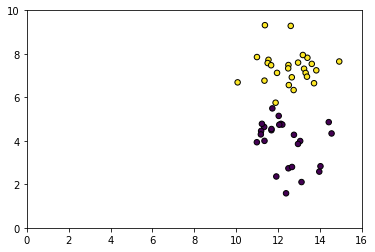

In [36]:
X,y = make_blobs(n_samples = 50, centers = 2, random_state = 4, cluster_std = 1)
X+=3
plt.scatter(X[:,0], X[:,1], c = y, s = 30, edgecolors= "black")
plt.xlim(0,16)
plt.ylim(0,10)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


(0, 10)

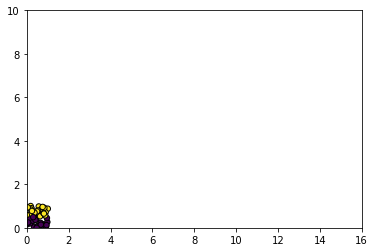

In [38]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)
plt.scatter(X_trans[:,0], X_trans[:,1], c = y, s = 30, edgecolors= "black")
plt.xlim(0,16)
plt.ylim(0,10)

([array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]),
  array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

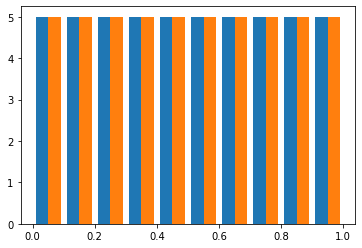

In [39]:
plt.hist(X_trans)

In [40]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 :", svm.score(X_test, y_test))

테스트 세트 정확도 : 0.6293706293706294


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(svm.score(X_test_scaled, y_test))

0.965034965034965


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
import os
import mglearn
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                  header = None, index_col=False,
                  names = ["age", "workclass", "fnlwgt", "education","edcatuion-num",
                          "martial-status", "occupation", "relationship", "race", "gender",
                          "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
data = data[["age", "workclass", "education", "gender", "hours-per-week",
            "occupation", "income"]]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [52]:
data_dummies = pd.get_dummies(data)
len(data_dummies.columns)

46

In [53]:
features = data_dummies.loc[:,"age":"occupation_ Transport-moving"]

X = features.values
y = data_dummies["income_ >50K"].values

In [56]:
demo_df = pd.DataFrame({"숫자 특성":[0,1,2,1], "범주형 특성":["양말","여우","양말","상자"]})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [57]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [58]:
ohe.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x1_상자', 'x1_양말', 'x1_여우'], dtype=object)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
[("scaling", StandardScaler(), ["age", "hours-per-week"]),
("onehot", OneHotEncoder(sparse=False),
["workclass", "education", "gender", "occupation"])])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_featurs = data.drop("income", axis = 1)